In [1]:
import os                                   
from sklearn.metrics import confusion_matrix
import seaborn as sn                        
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf   
import numpy as np

# Let's try to classify 1st dataset, that has only 3 classes(breeds of dog)

In [2]:
# Here's our 3 categories that we have to classify.
class_names = ['Basset', 'Chihuahua', 'Pekinese']
class_names_label = {'Basset': 0,
                    'Chihuahua' : 1,
                    'Pekinese' : 2
                    }
nb_classes = 3

# Loading first dataset
### (Actually it is just a bunch of folders wiht images, and that is why it takes so much code to implement, and time to process)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['dog_breeds/breed_train', 'dog_breeds/breed_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "C:/Users/AndriiHura/input/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

# Getting loaded data

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

# Here is short heap of information about our data

In [5]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 422
Number of testing examples: 54
Each image is of size: (150, 150, 3)


# Let's make a visualiazation of our data

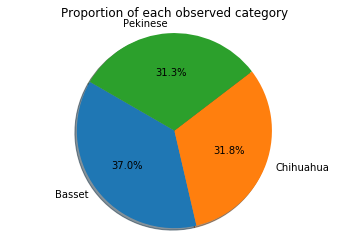

In [60]:
sizes = np.bincount(train_labels)
explode = (0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()


# Scaling data to [0, 1] interval

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Brief look at one of the images to test if we have read our data correctly

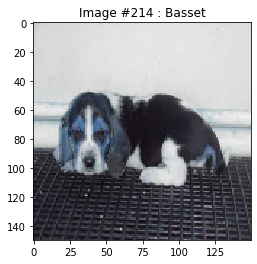

In [9]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

# Let's output some more images

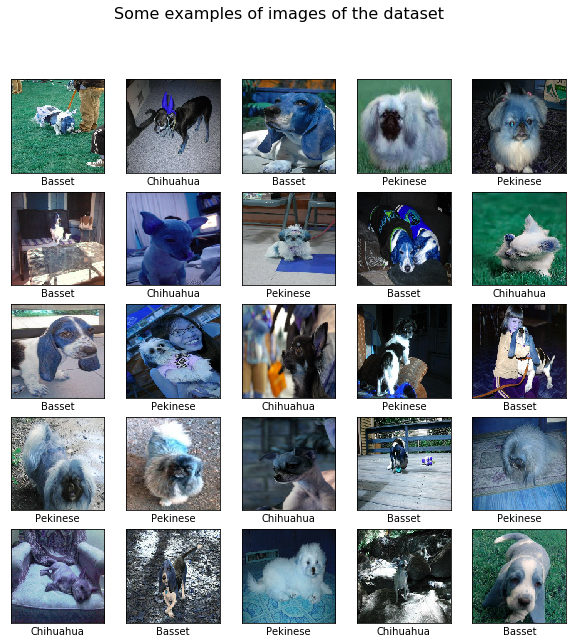

In [10]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building 1st model for 1st dataset(contains 128 layers of Dense)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning classifier on training set

In [13]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split = 0.2)

Train on 337 samples, validate on 85 samples
Epoch 1/5
337/337 [==============================] - 10s 30ms/sample - loss: 2.4496 - accuracy: 0.2789 - val_loss: 5.0066 - val_accuracy: 0.2941
Epoch 2/5
337/337 [==============================] - 7s 22ms/sample - loss: 3.3473 - accuracy: 0.3234 - val_loss: 1.1710 - val_accuracy: 0.3059
Epoch 3/5
337/337 [==============================] - 7s 21ms/sample - loss: 1.2520 - accuracy: 0.3976 - val_loss: 1.4168 - val_accuracy: 0.4118
Epoch 4/5
337/337 [==============================] - 7s 20ms/sample - loss: 1.3481 - accuracy: 0.3591 - val_loss: 1.2217 - val_accuracy: 0.2941
Epoch 5/5
337/337 [==============================] - 7s 21ms/sample - loss: 1.1216 - accuracy: 0.3650 - val_loss: 1.1604 - val_accuracy: 0.3059


# Plotting accuracy and loss changes respectivly to epohc's number

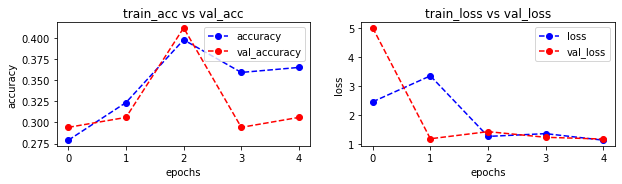

In [22]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Testing model's accuracy on test_data

In [25]:
test_loss = model.evaluate(test_images, test_labels)

54/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Initializing 2nd model(1024 dense layers)

In [15]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning 2nd model(15 epochs)

In [16]:
history2 = model2.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Train on 337 samples, validate on 85 samples
Epoch 1/15
337/337 [==============================] - 10s 31ms/sample - loss: 14.9819 - accuracy: 0.3205 - val_loss: 5.0633 - val_accuracy: 0.3176
Epoch 2/15
337/337 [==============================] - 9s 26ms/sample - loss: 4.2257 - accuracy: 0.3531 - val_loss: 1.1886 - val_accuracy: 0.2941
Epoch 3/15
337/337 [==============================] - 8s 25ms/sample - loss: 1.2123 - accuracy: 0.3412 - val_loss: 1.3359 - val_accuracy: 0.4471
Epoch 4/15
337/337 [==============================] - 9s 26ms/sample - loss: 1.2056 - accuracy: 0.4955 - val_loss: 1.0783 - val_accuracy: 0.4235
Epoch 5/15
337/337 [==============================] - 9s 25ms/sample - loss: 1.0461 - accuracy: 0.4036 - val_loss: 1.0796 - val_accuracy: 0.2941
Epoch 6/15
337/337 [==============================] - 9s 26ms/sample - loss: 0.9891 - accuracy: 0.5341 - val_loss: 1.0449 - val_accuracy: 0.4353
Epoch 7/15
337/337 [==============================] - 9s 26ms/sample - loss: 0.9302

# Plotting accuracy and loss changes respectivly to epohc's number

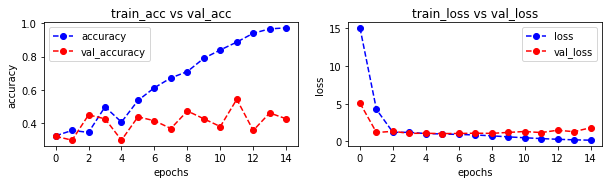

In [23]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history2.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history2.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history2.history['loss'],'bo--', label = "loss")
plt.plot(history2.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Accessing accuracy on test dataset

In [27]:
test_loss2 = model2.evaluate(test_images, test_labels)

54/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Initializing 3d model(256 Dense layers)

In [20]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning on training dataset

In [21]:
history3 = model3.fit(train_images, train_labels, batch_size=128, epochs=13, validation_split = 0.2)

Train on 337 samples, validate on 85 samples
Epoch 1/13
337/337 [==============================] - 6s 19ms/sample - loss: 4.5835 - accuracy: 0.3383 - val_loss: 3.4812 - val_accuracy: 0.4118
Epoch 2/13
337/337 [==============================] - 6s 19ms/sample - loss: 2.6512 - accuracy: 0.3591 - val_loss: 1.2452 - val_accuracy: 0.3059
Epoch 3/13
337/337 [==============================] - 6s 18ms/sample - loss: 1.2083 - accuracy: 0.3383 - val_loss: 1.1602 - val_accuracy: 0.2941
Epoch 4/13
337/337 [==============================] - 6s 18ms/sample - loss: 1.0813 - accuracy: 0.3472 - val_loss: 1.1200 - val_accuracy: 0.2941
Epoch 5/13
337/337 [==============================] - 6s 18ms/sample - loss: 1.0669 - accuracy: 0.5282 - val_loss: 1.1138 - val_accuracy: 0.2824
Epoch 6/13
337/337 [==============================] - 6s 18ms/sample - loss: 1.0245 - accuracy: 0.4718 - val_loss: 1.1839 - val_accuracy: 0.2824
Epoch 7/13
337/337 [==============================] - 6s 18ms/sample - loss: 1.0075 -

# Plotting dependency between epoch number and accaracy/loss

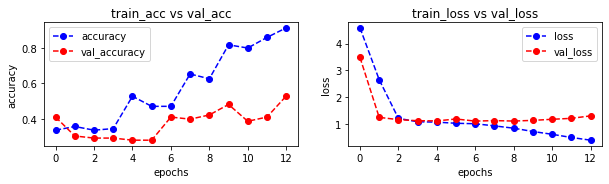

In [24]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history3.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history3.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history3.history['loss'],'bo--', label = "loss")
plt.plot(history3.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Accuracy on test set

In [28]:
test_loss3 = model3.evaluate(test_images, test_labels)

54/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Now Let's add some more breeds

In [34]:
# Here's our 6 categories that we have to classify.
class_names2 = ['Basset', 'Borzoi', 'Chihuahua', 'Golden_Retriever', 'Irish_Wolfhound', 'Pekinese', 'Yorkshire_Terrier' ]
class_names_label2 = {'Basset': 0,
                      'Borzoi': 1,
                      'Chihuahua' : 2,
                      'Golden_Retriever' : 3,
                      'Irish_Wolfhound' : 4,
                      'Pekinese' : 5,
                      'Yorkshire_Terrier' :6
                    }
nb_classes2 = 7

# Function for loading images from folder and converting them to arrays

In [31]:
def load_data2():
    
    datasets = ['dog_more_breeds/breed_train', 'dog_more_breeds/breed_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "C:/Users/AndriiHura/input/" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label2[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

# Loading data

In [ ]:
(train_images2, train_labels2), (test_images2, test_labels2) = load_data2()

# Here is short heap of information about our data

In [61]:
print ("Number of training examples: " + str(train_labels2.shape[0]))
print ("Number of testing examples: " + str(test_labels2.shape[0]))
print ("Each image is of size: " + str(train_images2.shape[1:]))

Number of training examples: 1041
Number of testing examples: 118
Each image is of size: (150, 150, 3)


# Data visualization

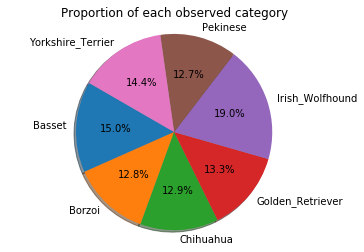

In [38]:
sizes2 = np.bincount(train_labels2)
explode2 = (0, 0, 0, 0, 0, 0, 0)  
plt.pie(sizes2, explode=explode2, labels=class_names2,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()


# Scaling data

In [39]:
train_images2 = train_images2 / 255.0 
test_images2 = test_images2 / 255.0

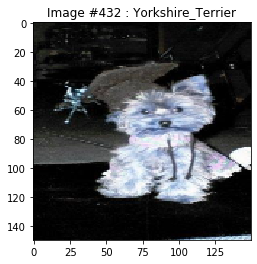

In [41]:
index = np.random.randint(train_images2.shape[0])
plt.figure()
plt.imshow(train_images2[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names2[train_labels2[index]])
plt.show()

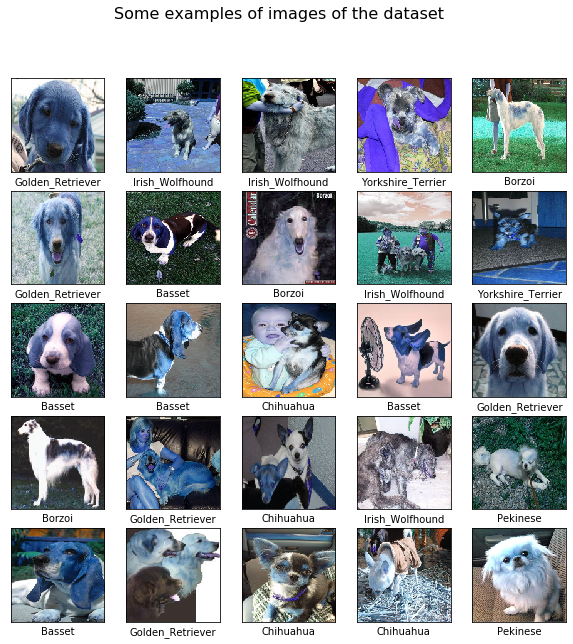

In [42]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images2[i], cmap=plt.cm.binary)
    plt.xlabel(class_names2[train_labels2[i]])
plt.show()

# Building 1st model(128 dense layers, 7 nodes in final layer) for 2nd dataset(7 classes)

In [48]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning our model on training data

In [49]:
history_1 = model_1.fit(train_images2, train_labels2, batch_size=128, epochs=5, validation_split = 0.2)

Train on 832 samples, validate on 209 samples
Epoch 1/5
832/832 [==============================] - 28s 34ms/sample - loss: 2.3351 - accuracy: 0.1274 - val_loss: 1.9415 - val_accuracy: 0.2010
Epoch 2/5
832/832 [==============================] - 15s 18ms/sample - loss: 1.9008 - accuracy: 0.2139 - val_loss: 1.9009 - val_accuracy: 0.2153
Epoch 3/5
832/832 [==============================] - 15s 18ms/sample - loss: 1.8174 - accuracy: 0.2909 - val_loss: 1.9162 - val_accuracy: 0.2010
Epoch 4/5
832/832 [==============================] - 15s 17ms/sample - loss: 1.6694 - accuracy: 0.3726 - val_loss: 1.8013 - val_accuracy: 0.2632
Epoch 5/5
832/832 [==============================] - 15s 17ms/sample - loss: 1.4057 - accuracy: 0.5469 - val_loss: 1.8070 - val_accuracy: 0.2823


# Plotting dependency between epoch number and accaracy/loss

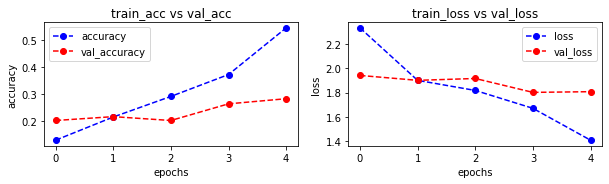

In [51]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history_1.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history_1.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history_1.history['loss'],'bo--', label = "loss")
plt.plot(history_1.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Accuracy on test set

In [53]:
test_loss_1 = model_1.evaluate(test_images2, test_labels2)

118/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Building 2nd model(1024 dense layers, 7 nodes in final layer) for 2nd dataset(7 classes)

In [56]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])
model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning our model on training data

In [57]:
history_2 = model_2.fit(train_images2, train_labels2, batch_size=128, epochs=15, validation_split = 0.2)

Train on 832 samples, validate on 209 samples
Epoch 1/15
832/832 [==============================] - 26s 31ms/sample - loss: 9.7324 - accuracy: 0.1647 - val_loss: 3.1818 - val_accuracy: 0.1388
Epoch 2/15
832/832 [==============================] - 19s 23ms/sample - loss: 2.2419 - accuracy: 0.1466 - val_loss: 1.9284 - val_accuracy: 0.1627
Epoch 3/15
832/832 [==============================] - 19s 23ms/sample - loss: 1.8714 - accuracy: 0.2620 - val_loss: 1.8497 - val_accuracy: 0.2584
Epoch 4/15
832/832 [==============================] - 19s 23ms/sample - loss: 1.6999 - accuracy: 0.3341 - val_loss: 1.7479 - val_accuracy: 0.2919
Epoch 5/15
832/832 [==============================] - 19s 23ms/sample - loss: 1.4524 - accuracy: 0.4868 - val_loss: 1.7313 - val_accuracy: 0.2967
Epoch 6/15
832/832 [==============================] - 19s 23ms/sample - loss: 1.1704 - accuracy: 0.6118 - val_loss: 1.7858 - val_accuracy: 0.3158
Epoch 7/15
832/832 [==============================] - 19s 23ms/sample - loss: 

# Plotting dependency between epoch number and accaracy/loss

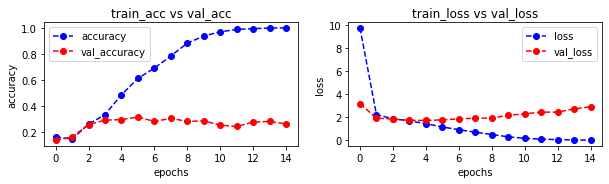

In [58]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history_2.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history_2.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history_2.history['loss'],'bo--', label = "loss")
plt.plot(history_2.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

# Accessing accuracy on 2nd model

In [59]:
test_loss_2 = model_2.evaluate(test_images2, test_labels2)

118/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Here, in this notebook I was working with 2 datasets, each about dog's breeds. I had tweo of them, 1st contains 3 unique classes, 2nd contains 7 unique classes.
### After classifing 1st one dataset, I managed to get maximum accuracy of 52 pproximately. I had an assumption that, If I add some more classes, It would be easier for model, to classify data correctly. But I was wrong, using same model, that gave us 52 percent on 1st dataset, gives us only about 34 percent on 2nd dataset.